In [1]:
import pandas as pd

In [25]:
d = pd.read_csv("/Users/noa/Workspace/protein_prediction.csv")
d2 = pd.read_csv("/Users/noa/Workspace/protein_prediction2.csv")
d = pd.concat([d,d2])

In [35]:
d.loc[d.true_support==0]

,Unnamed: 0,bootstrap_support,feature_partition_size,feature_partition_divergence,feature_partition_size_ratio,feature_divergence_ratio,feature_mean_bl_bipart,feature_min_bl_bipart,feature_max_bl_bipart,feature_min_vs_max_bl_bipart,...,feature_abayes,feature_min_ll_diff,feature_max_ll_diff,mle_tree_FEATURE_time,extra_FEATURE_extraction_time,total_nni_per_node_FEATURE_extraction_time,total_other_per_node_FEATURE_extraction_time,predicted_bootstrap_score_nni,predicted_bootstrap_score_no_nni,msa_ind
49,3,1.0,19.0,4.316252,0.112426,0.130607,0.190742,0.038615,0.512028,0.075416,...,1.000000,0.000051,0.000092,2.028537,14.142897,762.100892,6.908926,0.385747,0.323073,1
56,10,1.0,7.0,0.839835,0.041420,0.025413,0.156363,0.047872,0.298599,0.160322,...,0.999999,0.691858,0.692874,2.028537,14.142897,762.100892,6.908926,0.669619,0.687175,1
57,11,1.0,8.0,2.651045,0.047337,0.080219,0.140485,0.038615,0.277547,0.139130,...,1.000000,0.000003,0.000489,2.028537,14.142897,762.100892,6.908926,0.448064,0.325524,1
156,110,1.0,10.0,1.350959,0.059172,0.040879,0.045540,0.022288,0.079092,0.281798,...,0.999998,1.029724,1.402280,2.028537,14.142897,762.100892,6.908926,0.659796,0.550016,1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


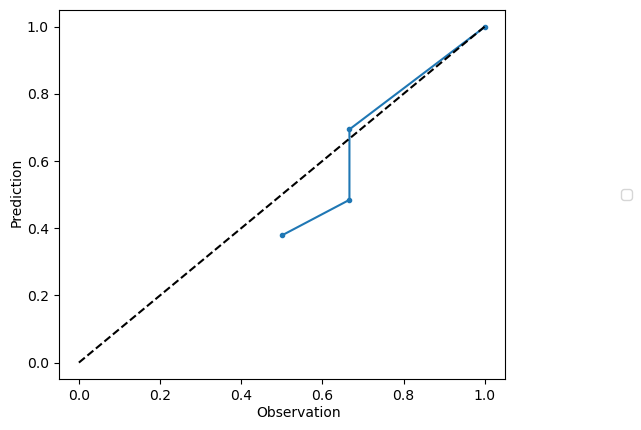

In [27]:
from sklearn.metrics import roc_auc_score

from sklearn.calibration import CalibratedClassifierCV, calibration_curve
import matplotlib.pyplot as plt


fig, ax = plt.subplots()
true_calibrated, pred_calibrated = calibration_curve(d['true_support'],d['predicted_bootstrap_score_nni'], n_bins=5)
ax.plot(true_calibrated, pred_calibrated, marker='.')
ax.plot([0, 1], [0, 1], linestyle='--', color='black')
#ax.set_xlabel('True probabilities')
#ax.set_ylabel('Predicted probabilities')
fig.text(0.5, 0.04, 'Observation', ha='center', va='center')
fig.text(0.06, 0.5, 'Prediction', ha='center', va='center', rotation='vertical')
#ax.legend(bbox_to_anchor=(0,0))
#ax.legend()
pos = ax.get_position()
ax.set_position([pos.x0, pos.y0, pos.width * 0.9, pos.height])
ax.legend(loc='center right', bbox_to_anchor=(1.3, 0.5))
    


In [28]:
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
matthews_corrcoef(d['true_support'],d['predicted_bootstrap_score_nni']>0.5)

0.4959839357429719

In [29]:
roc_auc_score(d['true_support'],d['predicted_bootstrap_score_nni'])

0.9944779116465863

In [31]:
import numpy as np
#plt.hist(d["predicted_bootstrap_score_nni"])
np.mean(d["predicted_bootstrap_score_nni"])
#np.mean(d["true_support"])


0.9896986035552756